<a href="https://colab.research.google.com/github/Laviniamadeira/TelecomX/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📌 ETAPA 1 - Importação de bibliotecas


In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

# 📌 ETAPA 2 - Extração de dados


In [246]:
# URL do arquivo JSON com os dados
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

# Leitura do JSON diretamente da URL
dados = pd.read_json(url)

In [247]:
# Faz a normalização (expande as colunas com dicionários)
dados_normalizados = pd.concat([
    dados.drop(['customer', 'phone', 'internet', 'account'], axis=1),
    pd.json_normalize(dados['customer']),
    pd.json_normalize(dados['phone']),
    pd.json_normalize(dados['internet']),
    pd.json_normalize(dados['account'])
], axis=1)

#salvando em um csv o dados limpos
dados_normalizados.to_csv("dados_limpos.csv", index=False)

In [248]:
# Criando dataframe principal
df = pd.DataFrame(dados_normalizados)
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


# 📌 ETAPA 3 - Transformação dos dados

In [249]:
# Convertendo colunas Yes e No para 0 e 1
colunas_binarias = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling','Churn','OnlineBackup','Charges.Total']

df[colunas_binarias] = df[colunas_binarias].replace({'Yes': 1, 'No': 0})
df[colunas_binarias] = df[colunas_binarias].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)


/tmp/ipython-input-1163780621.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[colunas_binarias] = df[colunas_binarias].replace({'Yes': 1, 'No': 0})


In [250]:
# Convertendo a coluna 'gender' para 0 e 1
df['gender'] = df['gender'].replace({'Female': 0, 'Male': 1})

/tmp/ipython-input-418299944.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace({'Female': 0, 'Male': 1})


In [251]:
# Conversao do tipo da coluna
df['Charges.Total'] = df['Charges.Total'].replace(' ', np.nan).astype(float)

#📌 ETAPA 4 - Padronização de nomes de colunas


In [252]:
# Limpando nome das colunas
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('.', '_')
display(df.head())

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total
0,0002-ORFBO,0,0,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.6,593.0
1,0003-MKNFE,0,1,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.0
2,0004-TLHLJ,1,1,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.0
3,0011-IGKFF,1,1,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.0
4,0013-EXCHZ,1,0,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.0


In [253]:
mapeamento_colunas = {
    'customerid': 'id_cliente',
    'churn': 'cancelamento',
    'gender': 'genero',
    'seniorcitizen': 'idoso',
    'partner': 'possui_conjuge',
    'dependents': 'possui_dependentes',
    'tenure': 'meses_como_cliente',
    'phoneservice': 'servico_telefonico',
    'multiplelines': 'multiplas_linhas',
    'internetservice': 'servico_internet',
    'onlinesecurity': 'seguranca_online',
    'onlinebackup': 'backup_online',
    'deviceprotection': 'protecao_dispositivo',
    'techsupport': 'suporte_tecnico',
    'streamingtv': 'tv_streaming',
    'streamingmovies': 'filmes_streaming',
    'contract': 'tipo_contrato',
    'paperlessbilling': 'fatura_online',
    'paymentmethod': 'metodo_pagamento',
    'charges_monthly': 'custo_mensal',
    'charges_total': 'custo_total',
    'contas_diarias': 'custo_diario'
}

df.rename(columns=mapeamento_colunas, inplace=True)

In [254]:
df.head()

,id_cliente,cancelamento,genero,idoso,possui_conjuge,possui_dependentes,meses_como_cliente,servico_telefonico,multiplas_linhas,servico_internet,...,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,tipo_contrato,fatura_online,metodo_pagamento,custo_mensal,custo_total
0,0002-ORFBO,0,0,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.6,593.0
1,0003-MKNFE,0,1,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.0
2,0004-TLHLJ,1,1,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.0
3,0011-IGKFF,1,1,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.0
4,0013-EXCHZ,1,0,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.0


# 📌 ETAPA 5 - Criação de novas métricas



In [255]:
# dados_normalizados['gender'].value_counts()

In [256]:
#Criando uma nova coluna para faturamento mensal
df['contas_diarias'] = df['custo_mensal'] / 30
display(df.head())

,id_cliente,cancelamento,genero,idoso,possui_conjuge,possui_dependentes,meses_como_cliente,servico_telefonico,multiplas_linhas,servico_internet,...,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,tipo_contrato,fatura_online,metodo_pagamento,custo_mensal,custo_total,contas_diarias
0,0002-ORFBO,0,0,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.0,2.186667
1,0003-MKNFE,0,1,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.0,1.996667
2,0004-TLHLJ,1,1,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.0,2.463333
3,0011-IGKFF,1,1,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.0,3.266667
4,0013-EXCHZ,1,0,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.0,2.796667


# 📌 ETAPA 6 - Salvando CSV final

In [257]:
# Salvando CSV final
df.to_csv("dados_limpos.csv", index=False)
print("Salvei os dados limpos no arquivo 'dados_limpos_alterado.csv'")

Salvei os dados limpos no arquivo 'dados_limpos_alterado.csv'


#📌 TAPA 7 - Estatísticas descritivas



In [258]:
print(df.describe())

       cancelamento       genero        idoso  possui_conjuge  \
count   7267.000000  7267.000000  7267.000000     7267.000000   
mean       0.257190     0.505711     0.162653        0.484106   
std        0.437115     0.500002     0.369074        0.499782   
min        0.000000     0.000000     0.000000        0.000000   
25%        0.000000     0.000000     0.000000        0.000000   
50%        0.000000     1.000000     0.000000        0.000000   
75%        1.000000     1.000000     0.000000        1.000000   
max        1.000000     1.000000     1.000000        1.000000   

       possui_dependentes  meses_como_cliente  servico_telefonico  \
count         7267.000000         7267.000000         7267.000000   
mean             0.300124           32.346498            0.902711   
std              0.458343           24.571773            0.296371   
min              0.000000            0.000000            0.000000   
25%              0.000000            9.000000            1.000000   


In [259]:
# Distribuição do cancelamento (churn)
cancel_counts = df['cancelamento'].value_counts()
cancel_pct = df['cancelamento'].value_counts(normalize=True) * 100

print(f"\n📊 Distribuição de Cancelamento:")
print(f"• Clientes ativos (0): {cancel_counts[0]:,} ({cancel_pct[0]:.2f}%)")
print(f"• Clientes que cancelaram (1): {cancel_counts[1]:,} ({cancel_pct[1]:.2f}%)")


📊 Distribuição de Cancelamento:
• Clientes ativos (0): 5,398 (74.28%)
• Clientes que cancelaram (1): 1,869 (25.72%)


# 📌 ETAPA 9 - VISUALIZAÇÕES

### 1️⃣ Visão geral: Distribuição do churn

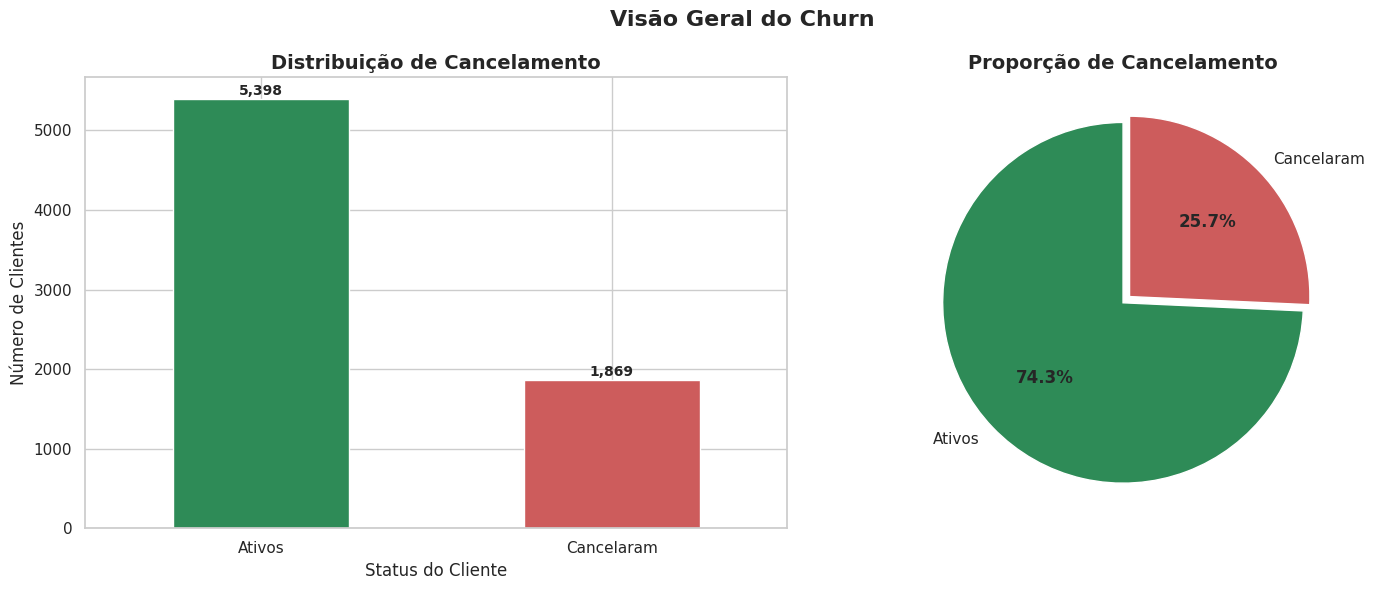

In [260]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Cores personalizadas
cores = ['#2E8B57', '#CD5C5C']  # Verde para ativo, vermelho para cancelado

# Gráfico de barras
cancel_counts.plot(kind='bar', ax=axes[0], color=cores, )
axes[0].set_title('Distribuição de Cancelamento')
axes[0].set_xlabel('Status do Cliente')
axes[0].set_ylabel('Número de Clientes')
axes[0].set_xticklabels(['Ativos', 'Cancelaram'], rotation=0)

# Valores acima das barras
for i, v in enumerate(cancel_counts.values):
    axes[0].text(i, v + 50, f'{v:,}', ha='center', fontweight='bold', fontsize=10)

# Gráfico de pizza
wedges, texts, autotexts = axes[1].pie(
    cancel_counts.values,
    labels=['Ativos', 'Cancelaram'],
    autopct='%1.1f%%',
    colors=cores,
    startangle=90,
    explode=(0, 0.05)
)

for autotext in autotexts:
    autotext.set_fontweight('bold')

axes[1].set_title('Proporção de Cancelamento')

plt.suptitle('Visão Geral do Churn', fontsize=16, fontweight='bold')
plt.tight_layout()

##2️⃣ Fatores principais de churn - VARIÁVEIS CATEGÓRICAS


📈 Análise de TIPO CONTRATO:
Taxa de Churn por categoria:
• Month-to-month: 41.32% (4,005 clientes)
• One year: 10.93% (1,519 clientes)
• Two year: 2.75% (1,743 clientes)

📈 Análise de METODO PAGAMENTO:
Taxa de Churn por categoria:
• Bank transfer (automatic): 16.24% (1,589 clientes)
• Credit card (automatic): 14.80% (1,568 clientes)
• Electronic check: 43.80% (2,445 clientes)
• Mailed check: 18.50% (1,665 clientes)

📈 Análise de SERVICO INTERNET:
Taxa de Churn por categoria:
• DSL: 18.45% (2,488 clientes)
• Fiber optic: 40.56% (3,198 clientes)
• No: 7.15% (1,581 clientes)


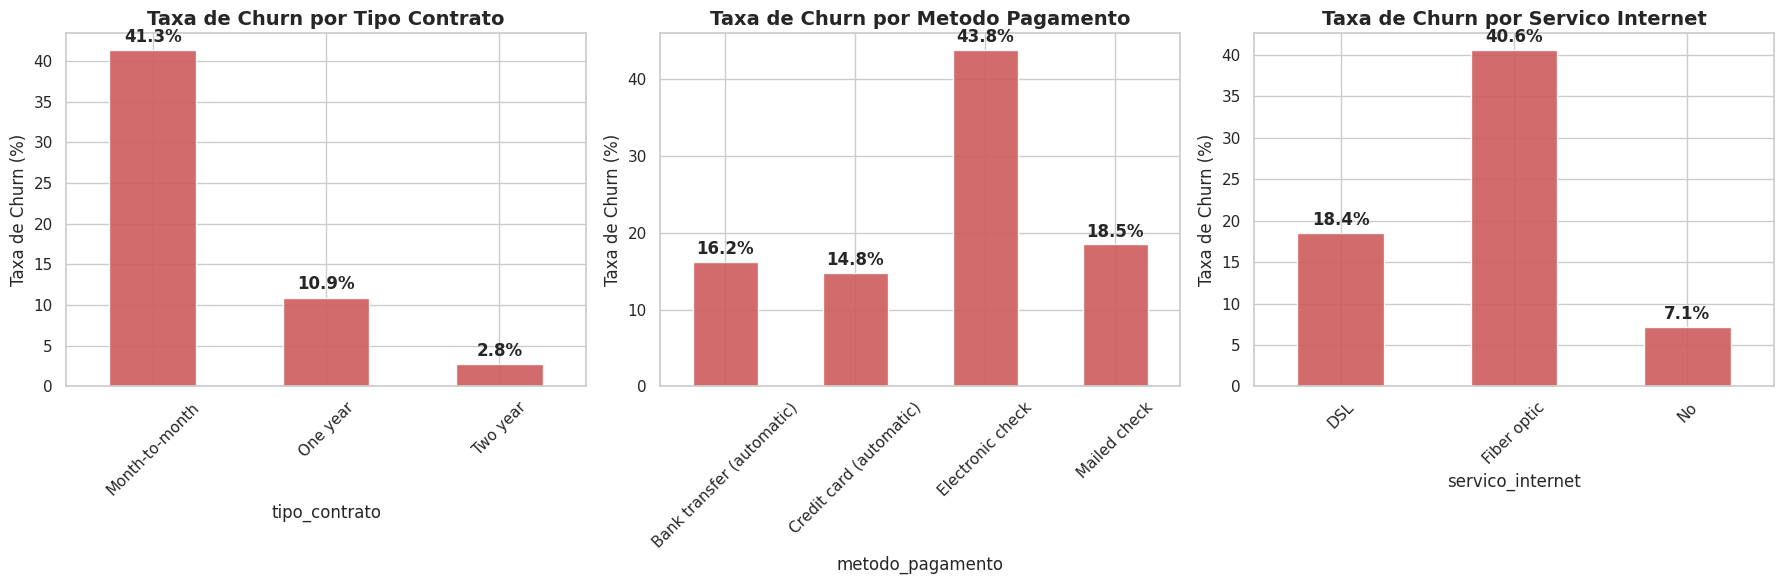

In [261]:
# Analisando as principais variáveis categóricas
variaveis_principais = ['tipo_contrato', 'metodo_pagamento', 'servico_internet']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, var in enumerate(variaveis_principais):
    if var in df.columns:
        # Calcular taxa de churn por categoria
        cross_tab = pd.crosstab(df[var], df['cancelamento'])
        churn_rate = pd.crosstab(df[var], df['cancelamento'], normalize='index') * 100

        print(f"\n📈 Análise de {var.upper().replace('_', ' ')}:")
        print("Taxa de Churn por categoria:")
        for categoria in churn_rate.index:
            taxa = churn_rate.loc[categoria, 1]
            total = cross_tab.loc[categoria].sum()
            print(f"• {categoria}: {taxa:.2f}% ({total:,} clientes)")

        # Plotar taxa de churn
        churn_rate[1].plot(kind='bar', ax=axes[i], color='#CD5C5C', alpha=0.9)
        axes[i].set_title(f'Taxa de Churn por {var.replace("_", " ").title()}')
        axes[i].set_ylabel('Taxa de Churn (%)')
        axes[i].tick_params(axis='x', rotation=45)

        # Adicionar valores nas barras
        for j, v in enumerate(churn_rate[1].values):
            axes[i].text(j, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

## 3️⃣ Análise de variáveis numéricas


In [262]:
# Variáveis numéricas para analisar
vars_numericas = ['meses_como_cliente', 'custo_mensal', 'custo_total']

# Análise estatística por grupo de churn
print("\n📈 Estatísticas por Grupo de Churn:")
for var in vars_numericas:
    print(f"\n{var.upper().replace('_', ' ')}:")
    grouped = df.groupby('cancelamento')[var].describe().round(2)
    print(grouped)# Variáveis numéricas para analisar
vars_numericas = ['meses_como_cliente', 'custo_mensal', 'custo_total']

# Análise estatística por grupo de churn
print("\n📈 Estatísticas por Grupo de Churn:")
for var in vars_numericas:
    print(f"\n{var.upper().replace('_', ' ')}:")
    grouped = df.groupby('cancelamento')[var].describe().round(2)
    print(grouped)


📈 Estatísticas por Grupo de Churn:

MESES COMO CLIENTE:
               count   mean    std  min   25%   50%   75%   max
cancelamento                                                   
0             5398.0  37.32  24.18  0.0  14.0  37.0  61.0  72.0
1             1869.0  17.98  19.53  1.0   2.0  10.0  29.0  72.0

CUSTO MENSAL:
               count   mean    std    min    25%    50%    75%     max
cancelamento                                                          
0             5398.0  61.35  31.11  18.25  25.10  64.50  88.64  118.75
1             1869.0  74.44  24.67  18.85  56.15  79.65  94.20  118.35

CUSTO TOTAL:
               count     mean      std   min    25%     50%      75%     max
cancelamento                                                                
0             5398.0  2534.80  2330.80   0.0  564.0  1663.0  4236.75  8672.0
1             1869.0  1531.32  1890.82  18.0  134.0   703.0  2331.00  8684.0

📈 Estatísticas por Grupo de Churn:

MESES COMO CLIENTE:
         

/tmp/ipython-input-2228827355.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot([dados_ativos, dados_cancelados],
/tmp/ipython-input-2228827355.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot([dados_ativos, dados_cancelados],
/tmp/ipython-input-2228827355.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot([dados_ativos, dados_cancelados],


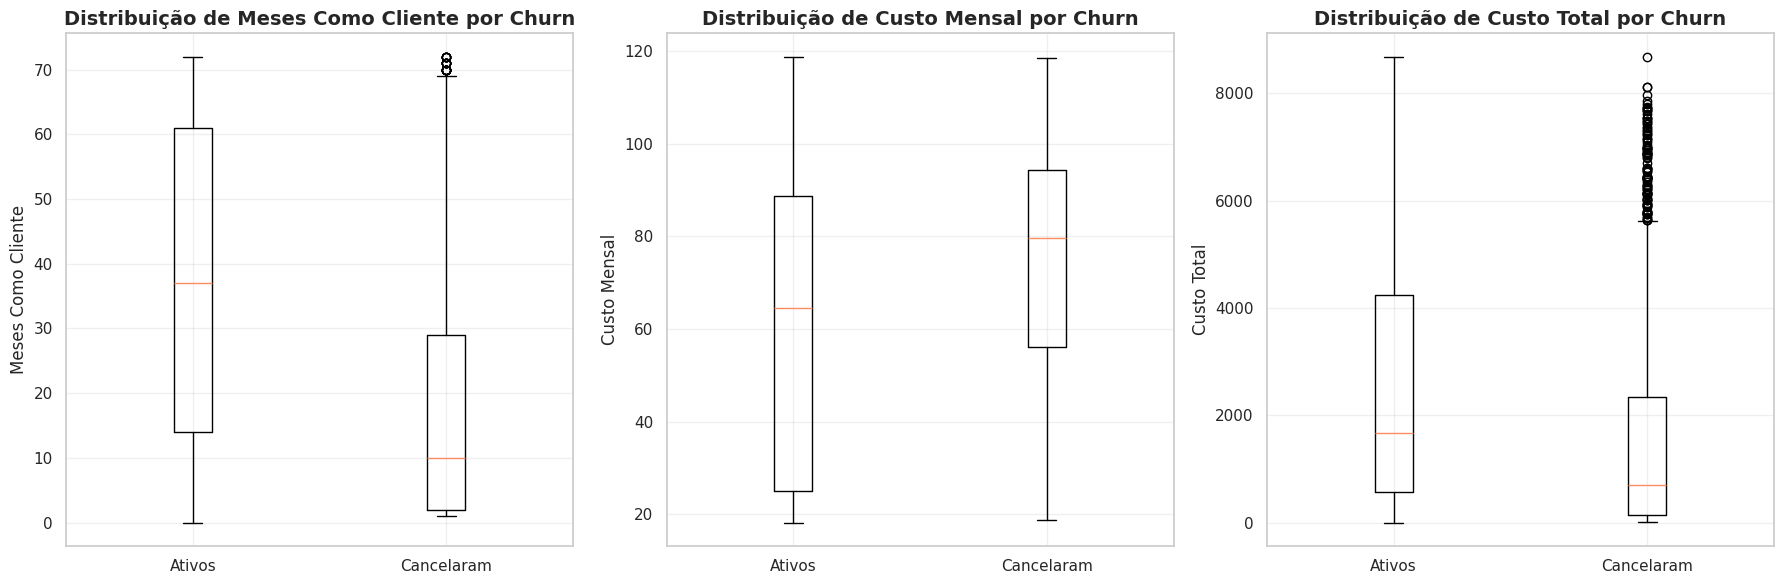

In [263]:
# Visualizações das variáveis numéricas - Boxplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, var in enumerate(vars_numericas):
    # Boxplot
    dados_ativos = df[df['cancelamento'] == 0][var]
    dados_cancelados = df[df['cancelamento'] == 1][var]

    axes[i].boxplot([dados_ativos, dados_cancelados],
                   labels=['Ativos', 'Cancelaram'])
    axes[i].set_title(f'Distribuição de {var.replace("_", " ").title()} por Churn')
    axes[i].set_ylabel(var.replace("_", " ").title())
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

##4️⃣ Histogramas comparativos

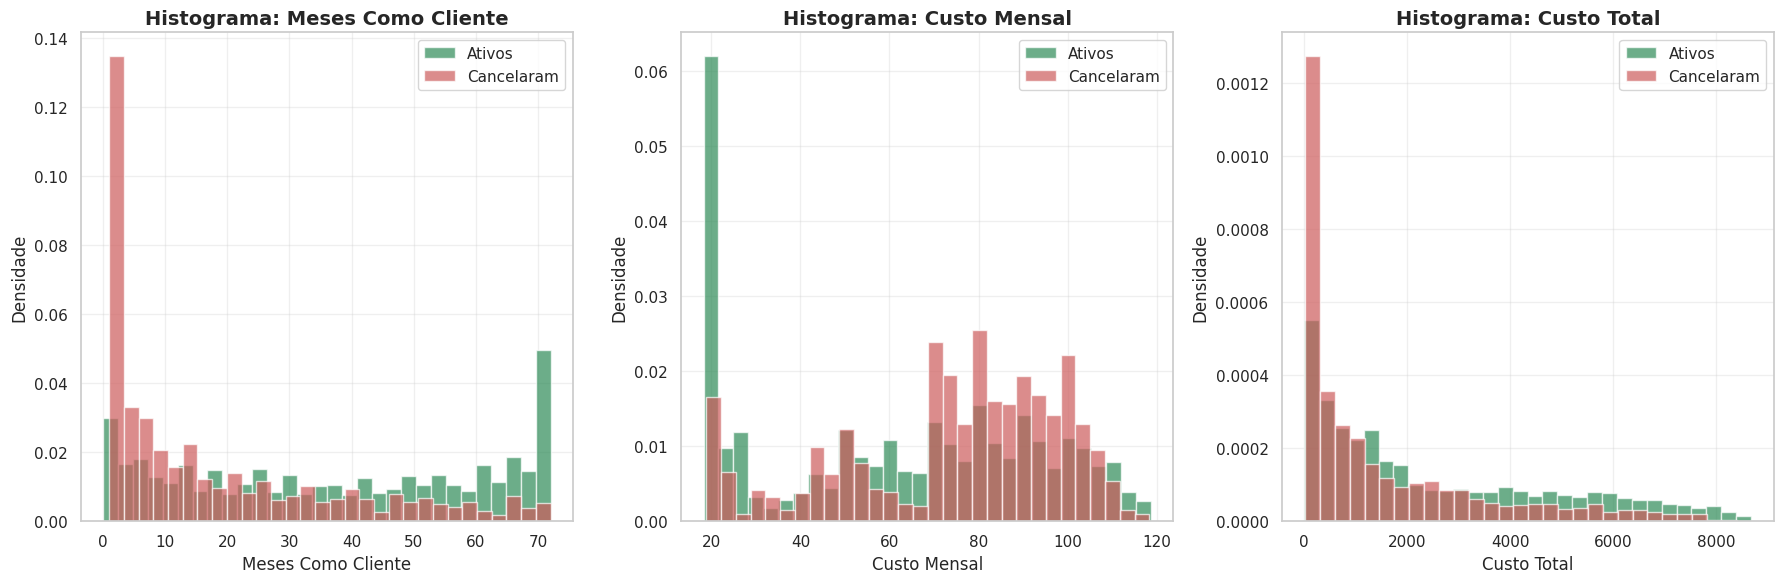

In [264]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, var in enumerate(vars_numericas):
    # Histogramas sobrepostos
    axes[i].hist(df[df['cancelamento']==0][var], alpha=0.7,
                label='Ativos', bins=30, color='#2E8B57', density=True)
    axes[i].hist(df[df['cancelamento']==1][var], alpha=0.7,
                label='Cancelaram', bins=30, color='#CD5C5C', density=True)
    axes[i].set_title(f'Histograma: {var.replace("_", " ").title()}')
    axes[i].set_xlabel(var.replace("_", " ").title())
    axes[i].set_ylabel('Densidade')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()


📊 Correlações com Cancelamento (ordenadas por magnitude):
• Meses Como Cliente: -0.344
• Custo Total: -0.193
• Contas Diarias: 0.190
• Custo Mensal: 0.190
• Fatura Online: 0.187
• Possui Dependentes: -0.161
• Suporte Tecnico: -0.160
• Possui Conjuge: -0.149
• Idoso: 0.147
• Backup Online: -0.080
• Protecao Dispositivo: -0.063
• Tv Streaming: 0.062
• Filmes Streaming: 0.061
• Multiplas Linhas: 0.039
• Servico Telefonico: 0.013
• Genero: -0.010


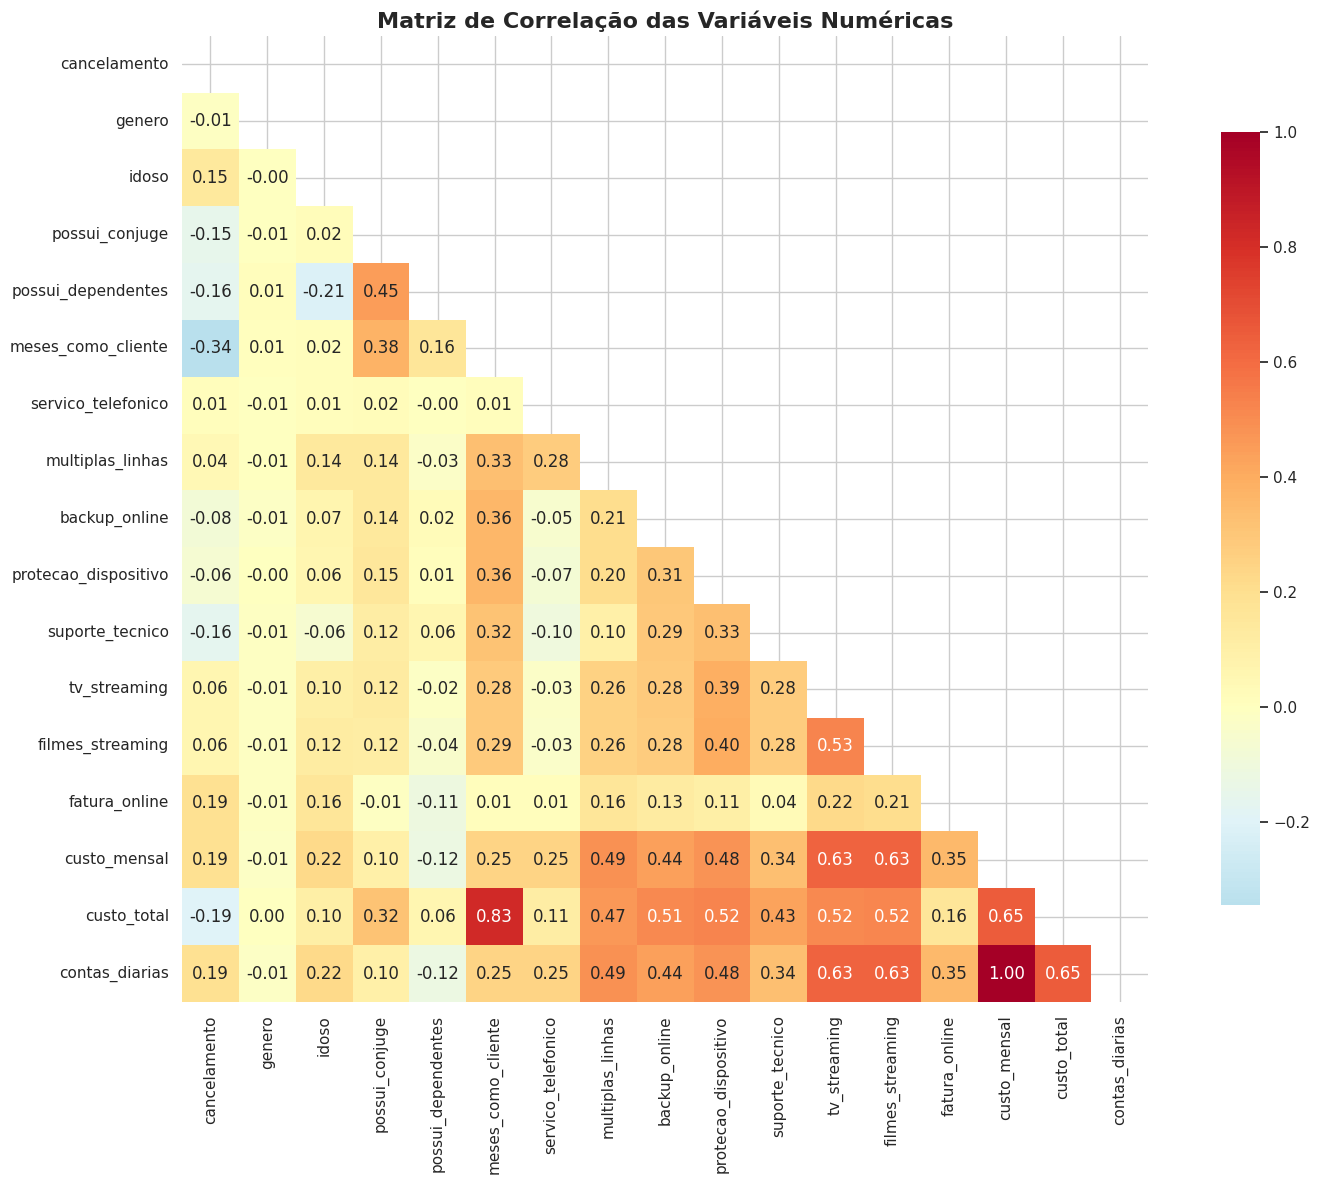

In [265]:
# Matriz de correlação
correlation_matrix = df.select_dtypes(include=[np.number]).corr()

# Correlações com churn
churn_correlations = correlation_matrix['cancelamento'].sort_values(key=abs, ascending=False)
print("\n📊 Correlações com Cancelamento (ordenadas por magnitude):")
for var, corr in churn_correlations.items():
    if var != 'cancelamento':
        print(f"• {var.replace('_', ' ').title()}: {corr:.3f}")

# Heatmap de correlação
plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix,
            mask=mask,
            annot=True,
            cmap='RdYlBu_r',
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={"shrink": .8})
plt.title('Matriz de Correlação das Variáveis Numéricas', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 📌 ETAPA 10 - INSIGHTS AUTOMATIZADOS

In [266]:
# Calcular insights automáticos
insights = []

# Taxa geral de churn
churn_rate = df['cancelamento'].mean() * 100
insights.append(f"• Taxa geral de churn: {churn_rate:.2f}%")

# Análise por contrato
contract_churn = df.groupby('tipo_contrato')['cancelamento'].mean() * 100
worst_contract = contract_churn.idxmax()
insights.append(f"• Pior tipo de contrato: {worst_contract} ({contract_churn[worst_contract]:.2f}% churn)")

# Análise por método de pagamento
payment_churn = df.groupby('metodo_pagamento')['cancelamento'].mean() * 100
worst_payment = payment_churn.idxmax()
insights.append(f"• Pior método de pagamento: {worst_payment} ({payment_churn[worst_payment]:.2f}% churn)")

# Análise por tenure
low_tenure_churn = df[df['meses_como_cliente'] <= 12]['cancelamento'].mean() * 100
high_tenure_churn = df[df['meses_como_cliente'] > 12]['cancelamento'].mean() * 100
insights.append(f"• Churn clientes novos (≤12 meses): {low_tenure_churn:.2f}%")
insights.append(f"• Churn clientes antigos (>12 meses): {high_tenure_churn:.2f}%")

# Análise por valor da conta
high_value_churn = df[df['custo_mensal'] > df['custo_mensal'].quantile(0.75)]['cancelamento'].mean() * 100
low_value_churn = df[df['custo_mensal'] <= df['custo_mensal'].quantile(0.25)]['cancelamento'].mean() * 100
insights.append(f"• Churn clientes alto valor: {high_value_churn:.2f}%")
insights.append(f"• Churn clientes baixo valor: {low_value_churn:.2f}%")

In [267]:
print("\n🔍 INSIGHTS AUTOMATIZADOS:")
for insight in insights:
    print(insight)


🔍 INSIGHTS AUTOMATIZADOS:
• Taxa geral de churn: 25.72%
• Pior tipo de contrato: Month-to-month (41.32% churn)
• Pior método de pagamento: Electronic check (43.80% churn)
• Churn clientes novos (≤12 meses): 45.78%
• Churn clientes antigos (>12 meses): 16.63%
• Churn clientes alto valor: 31.81%
• Churn clientes baixo valor: 10.79%
